# **1. Perkenalan Dataset**


**Sumber Dataset**:  
Dataset yang digunakan dalam proyek ini adalah dataset Seeds (biji-bijian gandum), yang merupakan salah satu dataset klasik dan banyak digunakan dalam studi dasar machine learning. Dataset ini diperoleh dari situs UCI Machine Learning Repository melalui tautan berikut: https://archive.ics.uci.edu/dataset/236/seeds. Dataset ini terdiri dari 210 baris data yang merepresentasikan tiga varietas biji gandum yang berbeda. Setiap baris mencakup berbagai ukuran morfologi biji gandum yang digunakan sebagai fitur input dalam proses klasifikasi.

Berikut adalah deskripsi masing-masing fitur dalam dataset:

| Fitur              | Tipe Data | Satuan | Deskripsi                                                         |
| ------------------ | --------- | ------ | ----------------------------------------------------------------- |
| **Area**           | Float     | mm²    | Luas dari penampang biji gandum                                   |
| **Perimeter**      | Float     | mm     | Keliling dari penampang biji gandum                               |
| **Compactness**    | Float     | -      | Rasio keliling kuadrat terhadap luas, menunjukkan kekompakan biji |
| **Length**         | Float     | mm     | Panjang biji gandum                                               |
| **Width**          | Float     | mm     | Lebar biji gandum                                                 |
| **AsymmetryCoeff** | Float     | -      | Koefisien asimetri bentuk biji                                    |
| **GrooveLength**   | Float     | mm     | Panjang lekukan biji                                              |
| **Type**           | Kategori  | -      | Jenis varietas biji gandum: `Kama`, `Rosa`, `Canadian`              |

**Tujuan Proyek**:
Tujuan utama dari proyek ini adalah membangun model klasifikasi menggunakan teknik supervised machine learning untuk memprediksi jenis varietas biji gandum berdasarkan karakteristik morfologi biji.

Secara khusus:
- Menggunakan tujuh fitur numerik dari biji gandum (Area, Perimeter, Compactness, Length, Width, AsymmetryCoeff, GrooveLength) sebagai input.
- Memprediksi label target yaitu Type (jenis biji gandum), yang terdiri dari tiga kelas:
   - Kama
   - Rosa
   - Canada
- Menerapkan dan membandingkan performa beberapa algoritma klasifikasi untuk menentukan model terbaik dalam mengenali varietas biji gandum berdasarkan fitur morfologinya.





# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. dataset yang digunakan ada pada file yang bernama `seeds_raw.csv`

In [2]:
# Load dataset
seed = pd.read_csv("../seeds_raw.csv")

# Tampilkan 5 data teratas
seed.head()

,AREA,PERIMETER,COMPACTNESS,LENGTH,WIDTH,ASSYMMETRY_COEFFICIENT,GROOVE_LENGTH,TYPE
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Cek info
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AREA                    210 non-null    float64
 1   PERIMETER               210 non-null    float64
 2   COMPACTNESS             210 non-null    float64
 3   LENGTH                  210 non-null    float64
 4   WIDTH                   210 non-null    float64
 5   ASSYMMETRY_COEFFICIENT  210 non-null    float64
 6   GROOVE_LENGTH           210 non-null    float64
 7   TYPE                    210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.3+ KB


In [4]:
seed.rename(columns={
    "AREA": "Area",
    "PERIMETER": "Perimeter",
    "COMPACTNESS": "Compactness",
    "LENGTH": "Length",
    "WIDTH": "Width",
    "ASSYMMETRY_COEFFICIENT": "AsymmetryCoeff",
    "GROOVE_LENGTH": "GrooveLength",
    "TYPE": "Type"
}, inplace=True)

In [5]:
# Statistik deskriptif
seed.describe()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,GrooveLength
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


C:\Users\Dell\AppData\Local\Temp\ipykernel_17152\577279965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=seed, x='Type', palette='Set2')


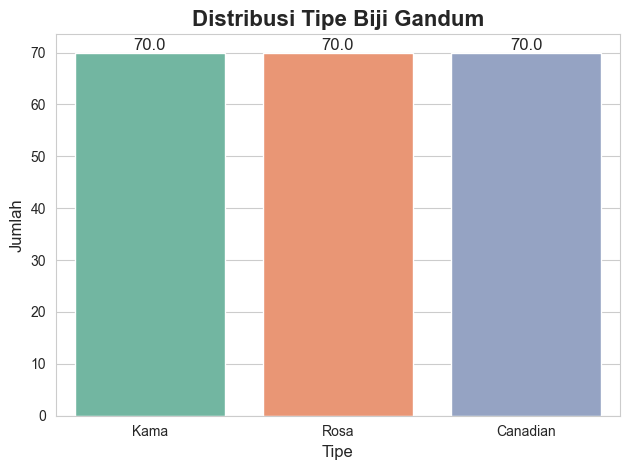

In [6]:
# Distribusi target
# Plot countplot dengan palette warna
sns.set_style("whitegrid")
ax = sns.countplot(data=seed, x='Type', palette='Set2')

# Menambahkan angka (annotate) di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Tipe Biji Gandum', fontsize=16, fontweight='bold')
plt.xlabel('Tipe', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

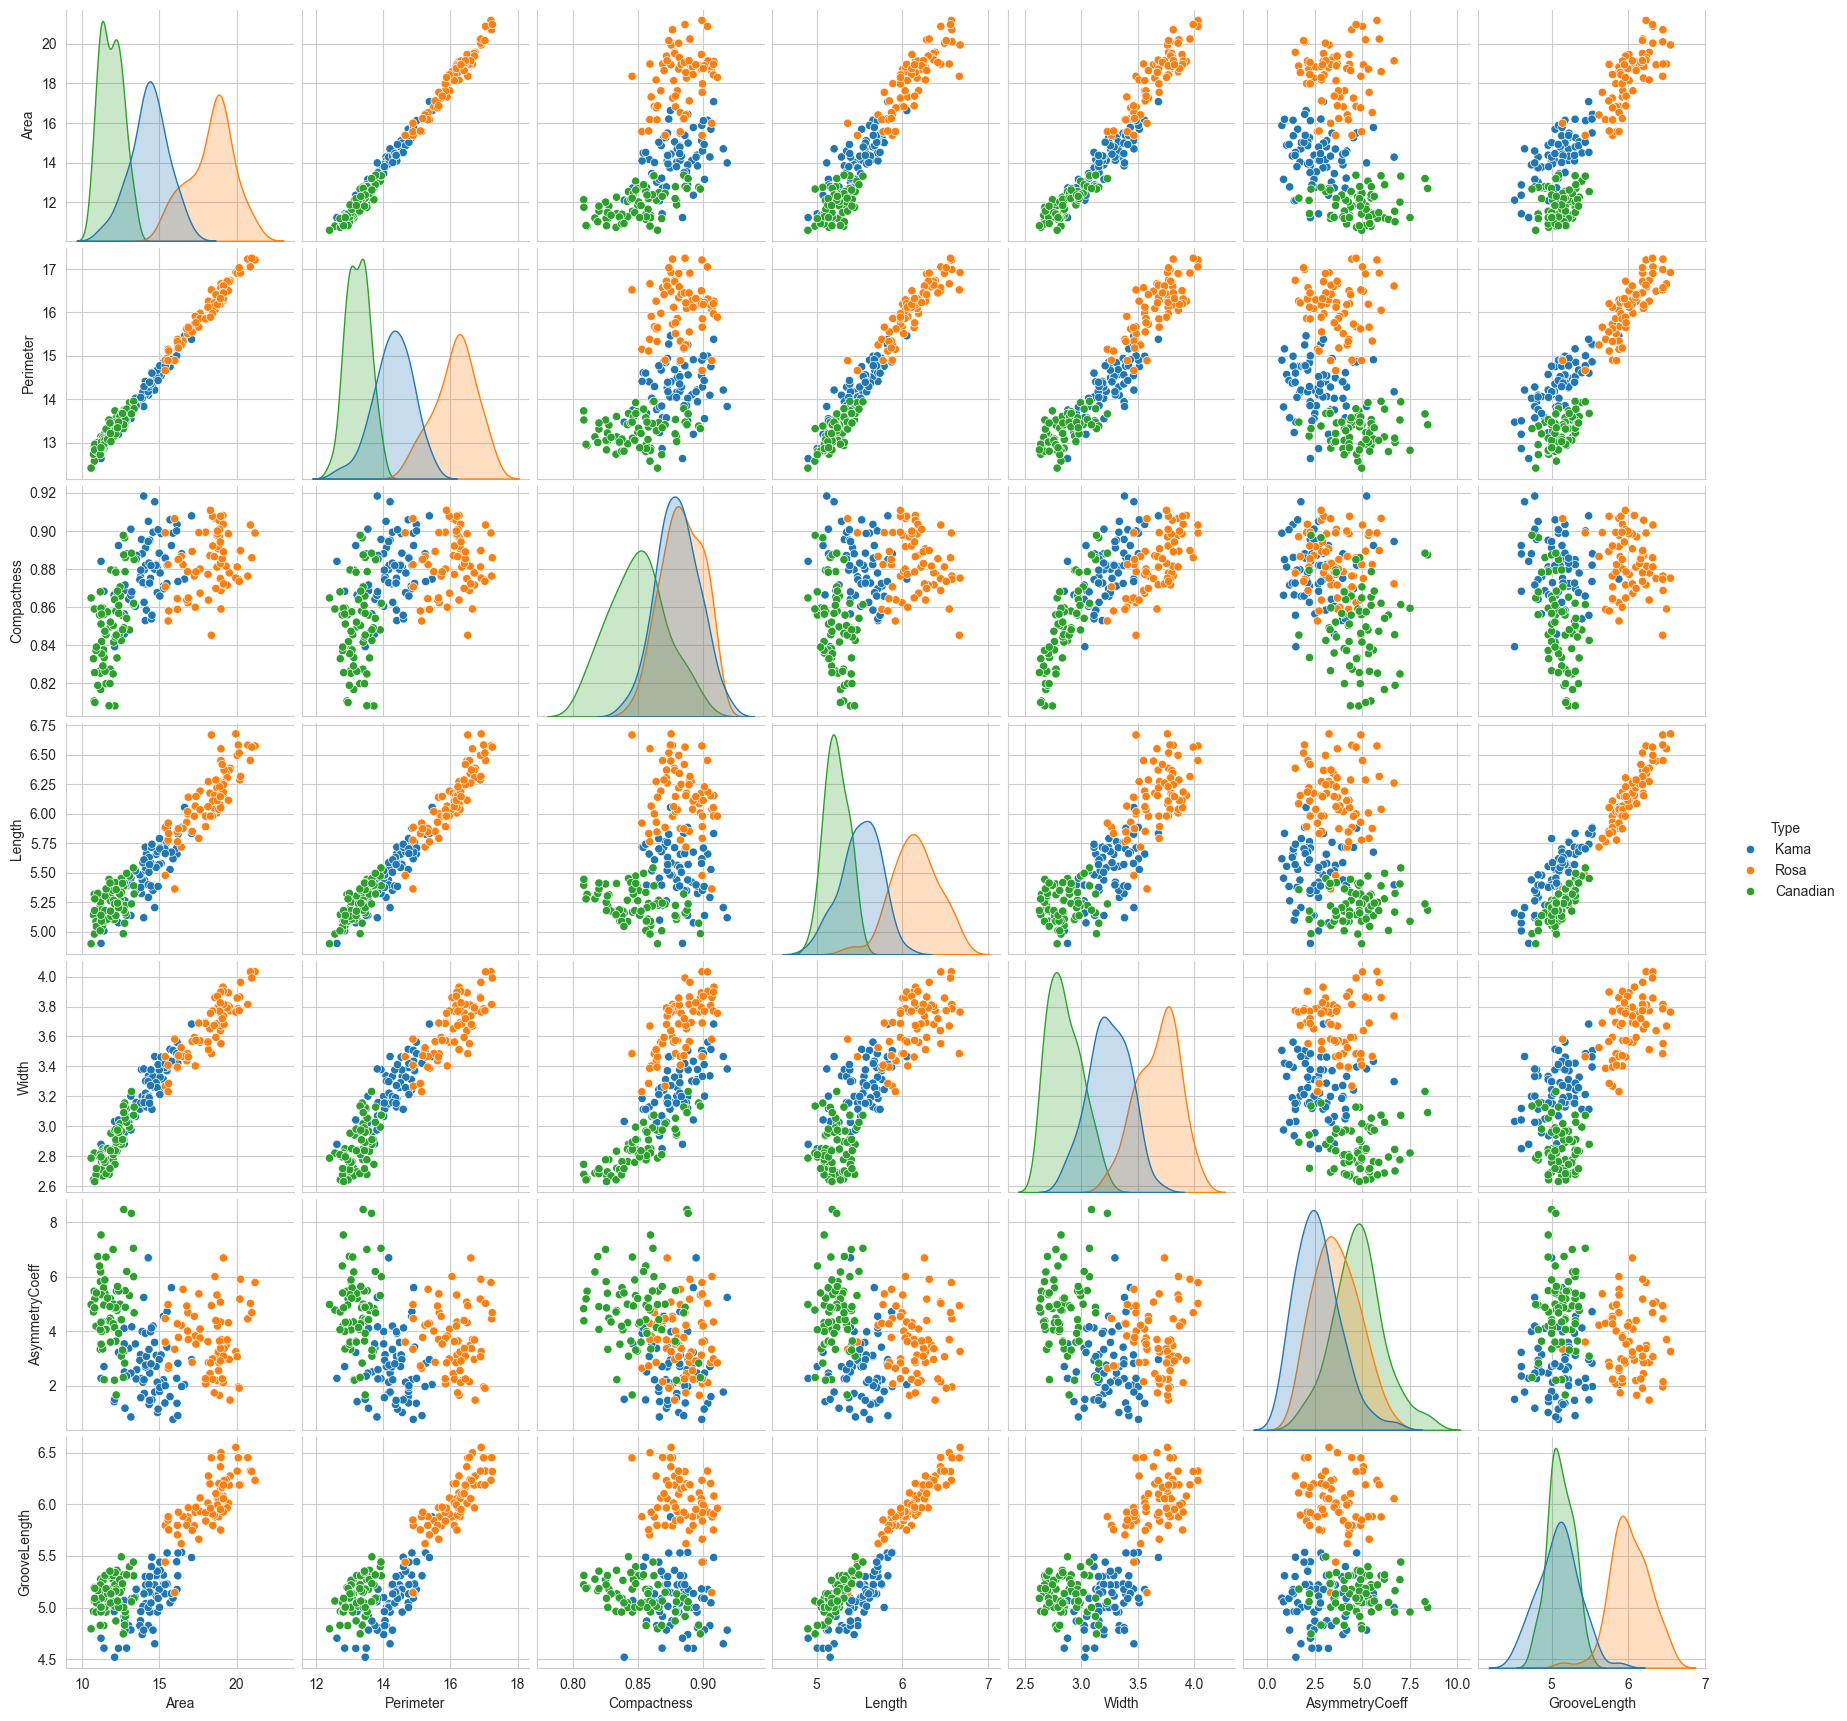

In [7]:
# Pairplot untuk melihat persebaran
sns.pairplot(seed, hue='Type')
plt.show()

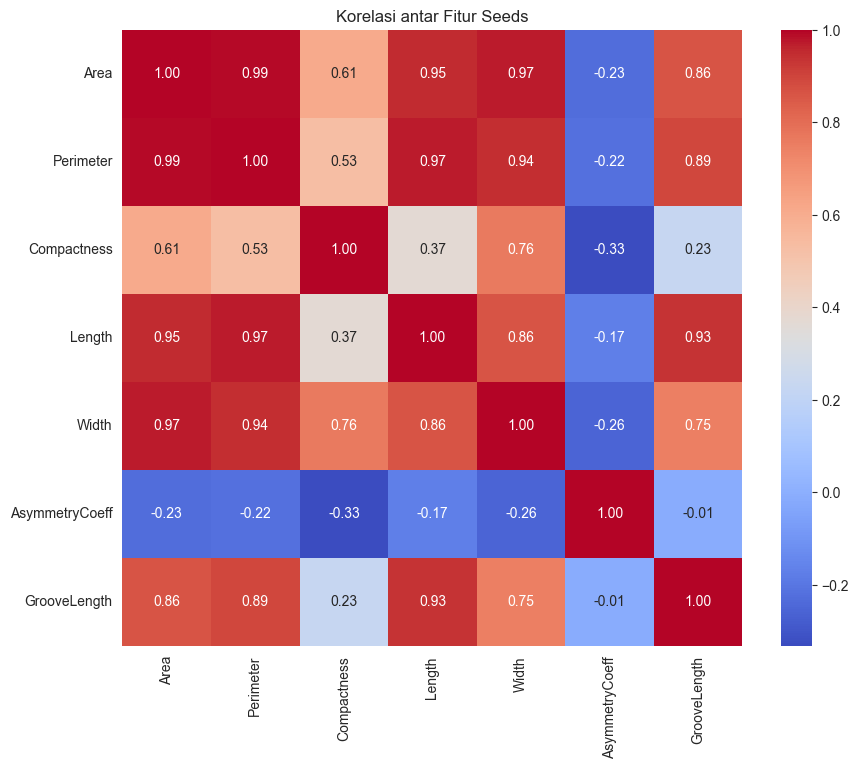

In [8]:
numerik = seed[['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'AsymmetryCoeff', 'GrooveLength']]

plt.figure(figsize=(10, 8))
sns.heatmap(numerik.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur Seeds')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Cek null
print("Jumlah nilai null:")
print(seed.isnull().sum())

Jumlah nilai null:
Area              0
Perimeter         0
Compactness       0
Length            0
Width             0
AsymmetryCoeff    0
GrooveLength      0
Type              0
dtype: int64


In [10]:
# Cek duplikat
print("\nJumlah duplikat:")
print(seed.duplicated().sum())


Jumlah duplikat:
0


In [11]:
# 1. Hapus kolom 'Id' (tidak digunakan dalam training)
if 'Id' in seed.columns:
    seed.drop('Id', axis=1, inplace=True)

In [12]:
# 2. Label Encoding kolom target 'Type'
le = LabelEncoder()
seed['Type'] = le.fit_transform(seed['Type'])  # Canadian=0, Kama=1, Rosa=2

In [13]:
# 3. Normalisasi fitur numerik
scaler = StandardScaler()
features = seed.columns[:-1]  # semua kecuali kolom target
seed[features] = scaler.fit_transform(seed[features])

In [14]:
# 4. Simpan hasil preprocessing
seed.to_csv('seed_preprocessing.csv', index=False)

print("Preprocessing selesai! Berikut contoh data:")
print(seed.head())

Preprocessing selesai! Berikut contoh data:
       Area  Perimeter  Compactness    Length     Width  AsymmetryCoeff  \
0  0.142098   0.215462     0.000061  0.304218  0.141702       -0.986152   
1  0.011188   0.008224     0.428515 -0.168625  0.197432       -1.788166   
2 -0.192067  -0.360201     1.442383 -0.763637  0.208048       -0.667479   
3 -0.347091  -0.475333     1.039381 -0.688978  0.319508       -0.960818   
4  0.445257   0.330595     1.374509  0.066666  0.805159       -1.563495   

   GrooveLength  Type  
0     -0.383577     1  
1     -0.922013     1  
2     -1.189192     1  
3     -1.229983     1  
4     -0.475356     1  


In [15]:
print(seed.describe())

               Area     Perimeter   Compactness        Length         Width  \
count  2.100000e+02  2.100000e+02  2.100000e+02  2.100000e+02  2.100000e+02   
mean  -3.383537e-16  1.184238e-16  1.285744e-15 -2.097793e-15 -3.383537e-16   
std    1.002389e+00  1.002389e+00  1.002389e+00  1.002389e+00  1.002389e+00   
min   -1.466714e+00 -1.649686e+00 -2.668236e+00 -1.650501e+00 -1.668209e+00   
25%   -8.879552e-01 -8.514330e-01 -5.980791e-01 -8.286816e-01 -8.349072e-01   
50%   -1.696741e-01 -1.836639e-01  1.039927e-01 -2.376280e-01 -5.733534e-02   
75%    8.465989e-01  8.870693e-01  7.116771e-01  7.945947e-01  8.044956e-01   
max    2.181534e+00  2.065260e+00  2.006586e+00  2.367533e+00  2.055112e+00   

       AsymmetryCoeff  GrooveLength        Type  
count    2.100000e+02  2.100000e+02  210.000000  
mean    -3.383537e-16 -8.987520e-17    1.000000  
std      1.002389e+00  1.002389e+00    0.818448  
min     -1.956769e+00 -1.813288e+00    0.000000  
25%     -7.591477e-01 -7.404953e-01   

Interpretasi Outputnya :
- Fitur-Fitur Numerik (Area, Perimeter, Compactness, Length, Width, AsymmetryCoeff, GrooveLength)

| Statistik     | Penjelasan                                                                                                                                                                                                                                                                                             |
| ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **mean ≈ 0**  | Semua nilai rata-rata mendekati nol (contoh: `mean ≈ -3.38e-16`) — ini adalah hasil dari **standardisasi**, yaitu proses mengubah skala data agar memiliki rata-rata 0.                                                                                                                                |
| **std ≈ 1**   | Semua fitur memiliki standar deviasi mendekati 1 (`std ≈ 1.002`) — artinya skala tiap fitur telah disetarakan. Ini sangat penting untuk algoritma yang sensitif terhadap skala, seperti SVM, KNN, atau PCA.                                                                                            |
| **min / max** | Nilai-nilai minimum dan maksimum kini berada dalam rentang -3 hingga +3. Nilai negatif menunjukkan bahwa observasi tersebut **berada di bawah rata-rata**, dan nilai positif berarti **di atas rata-rata** untuk fitur tersebut. Ini membantu model mengenali perbedaan antar sampel secara konsisten. |


- Kolom Species
    - mean = 1.0 → karena encoding menghasilkan nilai:
        - Canadian = 0
        - Kama = 1
        - Rosa = 2
        → Rata-rata 1.0 menunjukkan bahwa distribusi label cukup seimbang di antara ketiga kelas.

    - std = 0.818 → menunjukkan variasi label cukup seimbang (tidak terlalu bias ke satu kelas)